In [180]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(cowplot)

In [208]:
# Loaded data set and omitted N/A values

url <- "https://archive.ics.uci.edu/static/public/45/data.csv"
heart <-  read_csv(url)
heart <- na.omit(heart)
head(heart)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [209]:
# In the Cleveland dataset, any occurance of "num" other than 0 is considered a presence of heart disease
heart$num <- ifelse(heart$num >= 1 & heart$num <= 4, "yes", "no")

# Making num a factor variable
heart <- heart |>
        mutate(num = as_factor(num))
head(heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,no
67,1,4,160,286,0,2,108,1,1.5,2,3,3,yes
67,1,4,120,229,0,2,129,1,2.6,2,2,7,yes
37,1,3,130,250,0,0,187,0,3.5,3,0,3,no
41,0,2,130,204,0,2,172,0,1.4,1,0,3,no
56,1,2,120,236,0,0,178,0,0.8,1,0,3,no


In [210]:
# Separating data into training and testing sets
heart_split <- initial_split(heart, prop = 0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

In [211]:
# Seeing number of occurances of each class of our target variable "num"
distribution <- heart_training |>
                group_by(num) |>
                summarize(count = n())
distribution

num,count
<fct>,<int>
no,120
yes,102


In [232]:
# Making a table of means of each predictor, based on diagnosis

mean_chol <- heart_training |>
            group_by(num) |>
            summarize(chol = mean(chol))
mean_age <- heart_training |>
            group_by(num) |>
            summarize(age = mean(age))
mean_thalach <- heart_training |>
                group_by(num) |>
                summarize(thalach = mean(thalach))
mean_oldpeak <- heart_training |>
                group_by(num) |>
                summarize(oldpeak = mean(oldpeak))
mean_ca <- heart_training |>
                group_by(num) |>
                summarize(ca = mean(ca))


combined_means <- bind_rows(mean_chol, mean_age, mean_thalach, mean_oldpeak, mean_ca) |>
                    pivot_longer(cols = chol:ca,
                                names_to = "predictor_name",
                                values_to = "predictor_mean") |>
                    na.omit() |>
                    rename("heart_disease" = "num")
combined_means

heart_disease,predictor_name,predictor_mean
<fct>,<chr>,<dbl>
no,chol,240.5916667
yes,chol,247.6372549
no,age,52.3833333
yes,age,56.3529412
no,thalach,158.6250000
yes,thalach,140.6666667
no,oldpeak,0.5725000
yes,oldpeak,1.5460784
no,ca,0.3083333


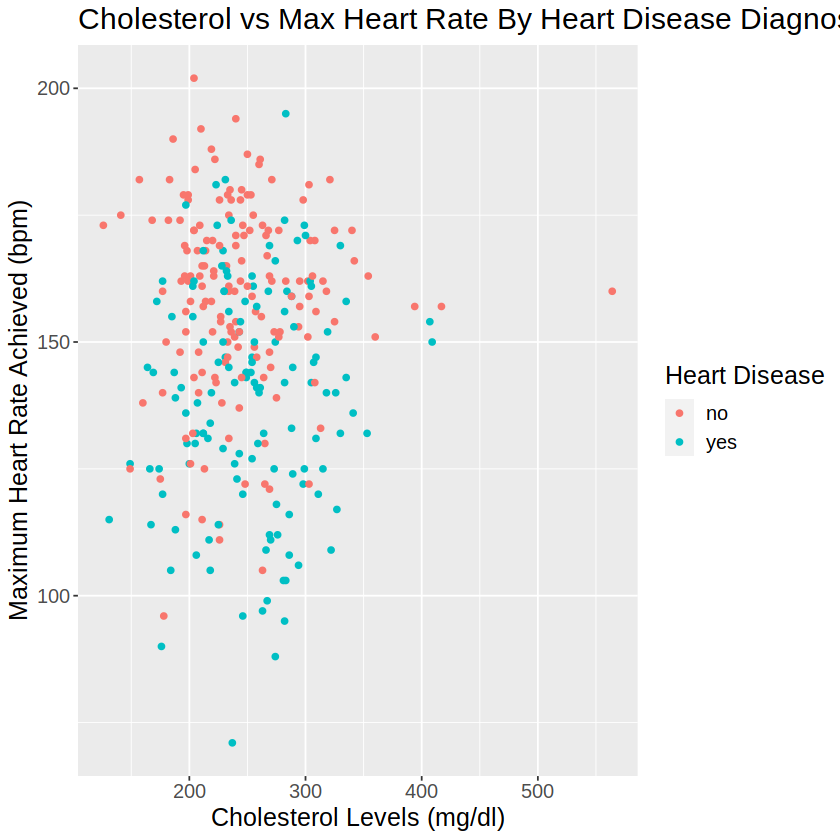

In [204]:
# Plotting cholesterol levels vs maximum heart rate achieved

# Converting "num" to a factor
heart$num <- as.factor(heart$num)

chol_vs_heart <- heart |>
    ggplot(aes(x = chol, y = thalach, color = num)) +
    geom_point() +
    labs(x = "Cholesterol Levels (mg/dl)", y = "Maximum Heart Rate Achieved (bpm)", color = "Heart Disease") +
    theme(text = element_text(size = 15)) +
    ggtitle("Cholesterol vs Max Heart Rate By Heart Disease Diagnosis")

chol_vs_heart


**What do you expect to find?**

We want to find student achievement in Mathematics from the two Portuguese schools in the data given. For each student, this data set includes variables that could potentially affect course performance, such as relationships, health, commute time, weekly study time, and parent occupations. Therefore, we look forward to finding how different combinations of these variables contribute to a student's performance in math, and which circumstances are correlated with students getting unsatisfactory grades in our exploratory analysis. 

**What impact could such findings have?**

Our model will help us identify which students are predicted to pass the class. Using this information, we can identify students who are at risk of failing the class and take preventive measures to ensure the identified students get enough support in school to pass. This could be done through after-school tutoring or offering these students classes that go at a slower pace, etc.

**What future questions could this lead to?**

In the future, we could compare the results of student achievement in Portuguese with the results in Mathematics to see if there's a correlation between good grades in one subject and good grades in the other. We could predict whether the students with good grades in Mathematics and Portuguese have the same habits and traits. We could also figure out common study patterns in good students to make study tips to recommend students to follow in order to get good grades in those two subjects.
